In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [3]:
# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('house_prices.csv')
df.describe(include="all").transpose()


,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540182.16,367362.23,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [4]:
x = df.drop(['price', 'id'], axis=1)
y = df['price']

In [5]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.5)
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [8]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter = 10000,activation = 'relu',  solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=10000)

In [10]:
y_pred = mlp_reg.predict(testX_scaled)
prediction_table = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
print(prediction_table.head(10))

        Actual  Predicted
4338    380000  422033.40
12221   474950  478957.55
17589   401000  633814.43
10188   330000  333743.84
8418   1300000 1214107.96
12608   291000  416988.74
10298   375000  334793.23
5514    421000  509532.70
6683    359000  399976.56
15207   250000  395560.56


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Absolute Percentage Error MAPE:', metrics.mean_absolute_percentage_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))
print('Mean R-Square:', metrics.r2_score(testY, y_pred))

Mean Absolute Error: 125375.6266952094
Mean Absolute Percentage Error MAPE: 0.25578124843185307
Mean Squared Error: 39127100371.752716
Root Mean Squared Error: 197805.71369844885
Mean R-Square: 0.7286105415254123


In [12]:
df = pd.read_csv('wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
print(df.shape)
df.describe().transpose()

(178, 14)


,count,mean,std,min,25%,50%,75%,max
Wine,178.00,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.00,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic.acid,178.00,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.00,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Acl,178.00,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Mg,178.00,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Phenols,178.00,2.30,0.63,0.98,1.74,2.35,2.80,3.88
Flavanoids,178.00,2.03,1.00,0.34,1.21,2.13,2.88,5.08
Nonflavanoid.phenols,178.00,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanth,178.00,1.59,0.57,0.41,1.25,1.56,1.95,3.58


In [14]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [15]:
#Let’s define our inputs and target variables then perform the training test split
X = df.drop('Wine',axis=1)
y = df['Wine']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Scale the Train and Test Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
%%time
from sklearn.model_selection import GridSearchCV
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500, 600, 700],
         }
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Train Accuracy : 1.000
Test Accuracy : 0.956
Best Accuracy Through Grid Search : 1.000
Best Parameters :  {'activation': 'identity', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}
CPU times: total: 2.47 s
Wall time: 25.3 s


In [20]:
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(50, 100),learning_rate='constant',max_iter=500,solver='lbfgs')
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=500, solver='lbfgs')

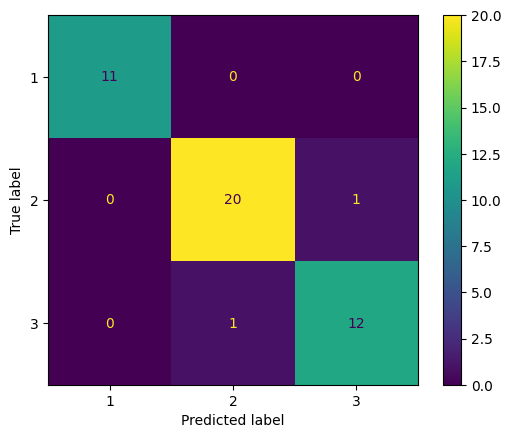

In [21]:
prediction = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

mlp_cm_test = confusion_matrix(y_test, prediction, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm_test, display_labels=mlp.classes_)
disp.plot()

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.95      0.95      0.95        21
           3       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

